## Семинар 4: Часть 2: Numpy, Matplotlib. 

## Numpy

Numpy $-$ это основная библиотека для научных вычислений на Python. Она предоставляет высокопроизводительные многомерные массивы и инструменты для работы с ними.

Чтобы использовать Numpy, нам сначала нужно импортировать пакет `numpy`:

In [149]:
import numpy as np

### Массивы (Arrays)

Массив numpy представляет собой сетку значений одного типа, индексируемых кортежем неотрицательных целых чисел. 

Мы можем инициализировать массивы numpy из вложенных списков Python и получать доступ к элементам с помощью квадратных скобок:

In [153]:
a = np.array([1, 2, 3])  # создаем массив размерности 1
print(type(a), a.shape, a[0], a[1], a[2]) 
a[0] = 5                 # изменяем значение элемента
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [154]:
b = np.array([[1,2,3],[4,5,6]])   # создаем массив размерности 2
print(b)

[[1 2 3]
 [4 5 6]]


In [156]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy также предоставляет множество функций для создания массивов:

In [ ]:
a = np.zeros((2,2))  # массив из всех нулей
print(a)

[[0. 0.]
 [0. 0.]]


In [ ]:
b = np.ones((1,2))   # массив из всех единиц
print(b)

[[1. 1.]]


In [157]:
c = np.full((2,2), fill_value=7) # массив из констант
print(c)

[[7 7]
 [7 7]]


In [159]:
d = np.eye(3)        # создает единичную матрицу 3x3
print(d)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
e = np.random.random((2,2)) # массив, заполненный случайными значениями
print(e)

[[0.8690054  0.57244319]
 [0.29647245 0.81464494]]


### Индексация массивов

Numpy предлагает несколько способов индексации массивов.

Нарезка: подобно спискам Python, массив numpy поддерживают slicing. Поскольку массивы могут быть многомерными, вы должны указать срез для каждого измерения массива:

In [178]:
import numpy as np

# Создаем массив вложенности 2 с размерностями (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Вытаскиваем подмассив, состоящий из первых двух строк
# и столбцов 1 и 2; b - результат, массив размерности (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


Срез массива - это представление тех же данных, поэтому его изменение приведет к изменению исходного массива.

In [179]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] - это та же ячейка, что и a[0, 1]
print(a[0, 1]) 

2
77


Можно совмещаться индексацию по индексу и индексацию срезами, но тогда вы получтие массив меньшей размерности, чем оригинальный

In [ ]:
# Создаем массив вложенности 2 с размерностями (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Два способа представления первой (0 индексация) строки массива:

In [184]:
row_r1 = a[1, :]    # представление (view) вложенности 1  
row_r2 = a[1:2, :]  # представление (view) вложенности 2
row_r3 = a[[1], :]  # представление (view) вложенности 2
print(row_r1, f"shape: {row_r1.shape}")
print(row_r2, f"shape: {row_r2.shape}")
print(row_r3, f"shape: {row_r3.shape}")

[5 6 7 8] shape: (4,)
[[5 6 7 8]] shape: (1, 4)
[[5 6 7 8]] shape: (1, 4)


Мы можем сделать то же самое для столбца:

In [185]:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[77  6 10] (3,)

[[77]
 [ 6]
 [10]] (3, 1)


Когда вы индексируете массивы numpy с использованием срезов, результирующее представление массива всегда будет подмассивом исходного массива. Напротив, индексирование целочисленными списками позволяет создавать произвольные массивы, используя данные из другого массива. Пример:

In [196]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a)

# пример такого индексирования
print(a[[0, 1, 2], [0, 1, 0]])

# код выше эквивалентен этому:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[[1 2]
 [3 4]
 [5 6]]
[1 4 5]
[1 4 5]


In [197]:
# мы можем переиспользовать тот же элемент
print(np.array([a[0, 1], a[0, 1]]))

# эквивалент
print(a[[0, 0], [1, 1]])

[2 2]
[2 2]


Один полезный трюк с  целочисленной индексацией $-$ это выбор или изменение одного элемента из каждой строки матрицы:

In [206]:
# создаем новый массив, из которого мы будем выбирать элементы
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [207]:
# создаем массив индексов
b = np.array([0, 2, 0, 1])

# выбираем по одному элементу из каждой строки в a, используя индексы из b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [209]:
# Изменяем по одному элементу из каждой строки в a, используя индексы из b
a[np.arange(4), b] *= -1
print(a)

[[-11   2   3]
 [  4   5 -16]
 [-17   8   9]
 [ 10 -21  12]]


Логическое индексирование массива позволяет выбирать произвольные элементы. Часто этот тип индексации используется для выбора элементов массива, удовлетворяющих какому-либо условию. Пример:

In [1]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Находит элементы, которые больше 2;
                    # возвращает numpy массив состоящий из Booleans
                    # размеры совпадают с исходным массивом, 
                    # True стоит там, где элемент > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [2]:
# Мы можем использовать такую индексацию для создания массива размерности 1
print(a[bool_idx])

# Но мы можем сделать это еще проще, используя лишь одно выражение:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


Для краткости мы упустили много деталей об индексировании массивов numpy; если вы хотите узнать больше, вам следует прочитать документацию.

## Типы данных

Каждый массив numpy представляет собой сетку элементов одного типа. Numpy предоставляет большой набор числовых типов данных, которые вы можете использовать для создания массивов. Numpy пытается угадать тип данных при создании массива, но функции, которые создают массивы, обычно также включают необязательный аргумент, который позволяет указать тип явно. Пример:

In [3]:
x = np.array([1, 2])  # numpy выбирает тип
y = np.array([1.0, 2.0])  #  numpy выбирает тип
z = np.array([1, 2], dtype=np.int64)  # Задаем тип явно

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


Подробнее о типах данных можно прочитать в [документации](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

## Операции над массивами

Базовые математические функции работают поэлементно с массивами и доступны, как в виде перегруженных операторов, так и в виде функций в модуле numpy:

In [4]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Поэлементная сумма; создаются новые массивы
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [5]:
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [6]:
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [12]:
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
# извлечение корня
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [11]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# векторное произведение
print(v.dot(w))
print(np.dot(v, w))

219
219


Вы также можете использовать оператор `@`, который эквивалентен оператору `dot` в numpy:

In [ ]:
print(v @ w)

219


In [13]:
# произведение матрицы на вектор;
# [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [14]:
# матричное произведение
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy предоставляет множество полезных функций для выполнения вычислений с массивами; одна из самых полезных $-$ sum:

In [15]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Вычисляет сумму всех элементов; печатает "10"
print(np.sum(x, axis=0))  # Вычисляет сумму для каждого столбца; печатает "[4 6]"
print(np.sum(x, axis=1))  # Вычисляет сумму для каждой строки; печатает "[3 7]"

10
[4 6]
[3 7]


В [документации](http://docs.scipy.org/doc/numpy/reference/routines.math.html) вы можете найти полный список математических функций, представленных в numpy.

Помимо вычисления математических функций с использованием массивов, нам часто нужно изменять форму или иным образом манипулировать данными. Простейший пример $-$ транспонирование матрицы; чтобы транспонировать матрицу, просто используйте атрибут T объекта массива:

In [ ]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [ ]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


## Broadcasting

Broadcasting $-$ это мощный механизм, позволяющий numpy работать с массивами различной формы при выполнении арифметических операций. Часто у нас есть два массива, и мы хотим использовать меньший, для выполнения операций над большим.

Например, предположим, что мы хотим добавить вектор к каждой строке матрицы. Мы могли бы сделать это так:

In [16]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # создаем пустую матрицы с размерами, как у x

# Добавялем в цикле:
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Это работает; однако, когда матрица `x` очень большая, вычисление в цикле могут быть медленными. Обратите внимание, что добавление вектора v к каждой строке матрицы «x» достаточно дорогая операция, которая каждый раз создает новую матрицу.

Numpy broadcasting позволяет нам выполнять это вычисление без фактического создания нескольких копий v. Рассмотрим эту версию:

In [18]:
import numpy as np

x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Строка `y = x + v` работает, даже если `x` имеет размеры `(4, 3)`, а `v` имеет размер `(3,)`; эта строка работает так, как если бы v на самом деле имела размер `(4, 3)`, где каждая строка была копией `v`, а суммирование производилось поэлементно.

Broadcasting двух массивов следует следующим правилам:

1. Если массивы имеют разный ранг, к размеру массива более низкой размерности добавляются единицы, пока размерности не будут иметь одинаковую длину.
2. Два массива считаются совместимыми в измерении, если они имеют одинаковый размер в этом измерении или если один из массивов имеет размер 1 в этом измерении.
3. Массивы могут обрабатываться, если они совместимы во всех измерениях.
4. После операции broadcsting каждый массив ведет себя так, как если бы он имел размер, равный поэлементному максимуму размеров двух входных массивов.
5. В любом измерении, где один массив имел размер 1, а другой массив имел размер больше 1, первый массив ведет себя так, как если бы он был скопирован по этому измерению.

Если вам трудно понять данное объяснение, вы можете посмотреть объяснение в этой [документации](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) или в этой [документации](http://wiki.scipy.org/EricsBroadcastingDoc).

Функции, поддерживающие broadcasting, известны как универсальные функции. Вы можете найти их в [документации](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Несколько примеров применения:

In [19]:
# Матричное произведение двух векторов:
v = np.array([1,2,3])  # размер v (3,)
w = np.array([4,5])    # размер w (2,)
# Изменяем размеры v, чтобы сделать столбцом
# теперь мы можем использовать broadcasting для вычисления произвденеия с w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [22]:
# Добавить вектор v к каждой строке матрицы x:
x = np.array([[1,2,3], [4,5,6]])
# размер x (2, 3), а размер v (3,), поэтому broadcast будет работать с размером (2, 3),
# получаем следующую матрицу:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [23]:
# Добавить вектор к каждому столбцу матрицы:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [ ]:
# Другое решение - преобразовать w в вектор-строку размера (2, 1);
# и применить broadcasting
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [24]:
# Умножить матрицу на константу:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting, обычно, делает ваш код более кратким и быстрым, поэтому вам следует стремиться использовать его там, где это возможно.

Этот краткий обзор затронул многие важные вещи, которые вам нужно знать о numpy, но он далеко не полный. Ознакомьтесь со [ссылкой](http://docs.scipy.org/doc/numpy/reference/), чтобы узнать больше о numpy.

## Matplotlib

Matplotlib - это библиотека для построения графиков. В этом разделе мы кратком рассмотрим модуль `matplotlib.pyplot`.

In [187]:
import matplotlib.pyplot as plt

Запустив эту специальную команду iPython, мы разрешим отображать графики:

In [188]:
%matplotlib inline

### Plotting

Самая важная функция в matplotlib - это plot, которая позволяет вам строить диаграммы. Вот простой пример:

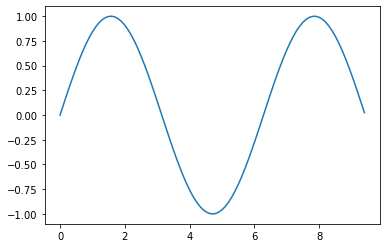

In [189]:
# Вычисляем координаты x и y, для синусойды
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

Приложив немного дополнительных усилий, мы можем легко построить сразу несколько строк и добавить заголовок, легенду и оси координат:

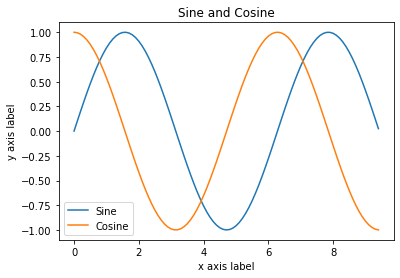

In [190]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

Вы можете нарисовать разные объекты на одном и том же рисунке, используя функцию `subplot`. Вот пример:

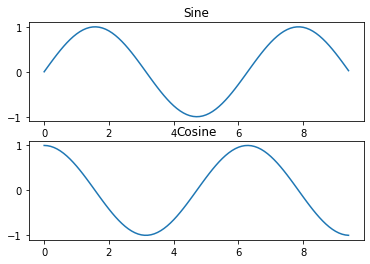

In [192]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Задаем subplot сетку высоты 2 и ширины 1,
# и выбираем ее, как активную.
plt.subplot(2, 1, 1)

# Рисуем
plt.plot(x, y_sin)
plt.title('Sine')

# создаем и выбираем следующий subplot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Рисуем.
plt.show()

Вы можете узнать больше о функции `subplot` в [документации](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).